# Graaf vinden met bepaalde ratio diameter/avg-path-length

#### Thomas Schaper, 10812350 & Olmo Kramer, 10175490

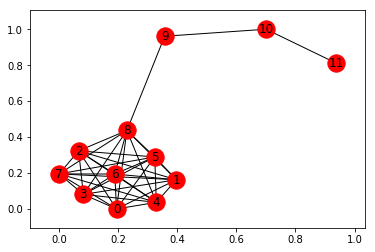

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import sys

%matplotlib inline


def gen_graph(k, n):
    res = nx.complete_graph(k)
    for i in range(k, k + n):
        res.add_edge(i, i-1)

    return res


G = gen_graph(9, 3)

nx.draw_networkx(G)
plt.show()

We karakteriseren grafen van de vorm hierboven met twee parameters: $n$ is het aantal knopen in de "arm" van de graaf en $k$ het aantal knopen in de volledige component. We kunnen de diameter van de graaf eenvoudig bepalen, die is namelijk $n+1$, de afstand van de knoop aan het eind van de arm tot een willekeurige knoop in de volledige component, de knoop waaraan de arm is verbonden uitgesloten.

Voor de average path length bepalen we de totale padlengte en het aantal paden in de graaf. Het totaal aantal paden is simpel: de graaf is connected, dus het totaal aantal paden is $\frac{(n+k)(n+k-1)}{2}$.

De totale padlengte bestaat uit drie componenten:

1. De totale padlengte voor de knoop in de volledige component waaraan de arm is verbonden.
1. De gecombineerde totale padlengte voor de overige knopen in de volledige component.
1. De gecombineerde totale padlengte voor alle nodes in de arm.

De totale padlengte voor de knoop waaraan de arm is verbonden is $k-1$ voor het pad naar elke overige knoop in de component, en $\Sigma_{i=1}^ni=\frac{n(n+1)}{2}$ voor de paden naar de knopen in de arm. In totaal dus $k-1+\frac{n(n+1)}{2}$.

Voor de overige knopen in de component geldt een vergelijkbare formule, alleen hun afstand naar de knopen in de arm is 1 groter. Het totaal is dus $k-1+\Sigma_{i=1}^ni+1=k-1+\frac{n(n+3)}{2}$.

Tot slot delen we de totale padlengte voor de knopen in de arm op in 2 componenten: de afstand tot andere knopen in de arm en de afstand tot de knopen in de volledige component.

Een knoop $i$ op afstand $i$ van de knoop waaraan de arm is verbonden heeft afstand $\Sigma_{j\neq i}^n|i-j|$ tot de andere knopen in de arm. Dit kan vereenvoudigd worden door

\begin{align}
\Sigma_{i\neq j}^n|j-i| &= \left(\Sigma_{j=1}^{i-1}i-j\right) + \left(\Sigma_{j=i+1}^{n}j-i\right) = \left(\Sigma_{j=1}^{i-1}j\right) + \left(\Sigma_{j=1}^{n-i}j\right) \\
                        &= \left(\frac{(i-1)(i-1+1)}{2}\right) + \left(\frac{(n-i)(n-i+1)}{2}\right) \\
                        &= \frac{i^2-i+n^2-in+n-in+i^12-i}{2} \\
                        &= i^2-i(n+1)+\frac{n(n+1)}{2}
\end{align}

Nu kunnen we de vorige expressie sommeren over alle $i$

\begin{align}
\Sigma_{i=1}^ni^2-i(n+1)+\frac{n(n+1)}{2} &= \frac{n(n+1)(2n+1)}{6} - (n+1)\frac{n(n+1)^2}{2} + \frac{(n+1)n^2}{2} \\
                                          &= \frac{2n^3+3n^2+n}{6} - \frac{n(n+1)}{2} \\
                                          &= \frac{2n^3-2n}{6} = \frac{n^3-n}{3}
\end{align}

De afstand tot de knopen in de component is $i$ tot de knoop waaraan de arm verbindt plus $(k-1)(i+1)$ naar de andere knopen. Sommatie over alle $i$ geeft

\begin{align}
(\Sigma_{i=1}^ni+(i+1)(k-1)) &= (\frac{n(n+1)}{2} + \frac{n(n+3)(k-1)}{2}) \\
\end{align}

Nu kunnen we de totale padlengte voor de knopen in de arm schrijven als

\begin{align}
(\frac{n(n+1)}{2} + \frac{n(n+3)(k-1)}{2}) + \frac{n^3 - n}{3} &= \frac{3n(n+1) + 3n(n+3)(k-1) + 2n^3 - 2n}{6} \\
                                                               &= \frac{n(2n^2 + 3kn + 9k - 8)}{6}
\end{align}

De totale som van de kortste paden van elke node naar elke node in de gehele graaf kan nu worden geschreven als $(k-1 + \frac{n(n + 1)}{2}) + (k-1)(k-1 + \frac{n(n+3)}{2}) + \frac{n(2n^2+3kn+9k-8)}{6}$, maar dan tellen we elk pad dubbel.

De average path length van de volledige graaf is dus 

$$
\frac{(k-1 + \frac{n(n + 1)}{2}) + (k-1)(k-1 + \frac{n(n+3)}{2}) + \frac{n(2n^2+3kn+9k-8)}{6}}{(n+k)(n+k-1)}
$$

Nu kunnen we een expressie opstellen voor de verhouding van de diameter tot de average path length:

$$
\frac{\text{diameter}}{\text{avg. path length}}=\frac{n+1}{\left(\frac{(k-1 + \frac{n(n + 1)}{2}) + (k-1)(k-1 + \frac{n(n+3)}{2}) + \frac{n(2n^2+3kn+9k-8)}{6}}{(n+k)(n+k-1)}\right)}
$$

In [2]:
%load_ext Cython
import cython

In [3]:
%%cython
import numpy as np
import networkx as nx
import sys

cdef double outgoing(int k, int n):
    return k - 1 + n * (n + 1) / 2


cdef double internal(int k, int n):
    return (k - 1) * (k - 1 + n * (n + 3) / 2)


cdef double arm(int k, int n):
    return (n * (2 * n ** 2 + 3 * k * n + 9 * k - 8)) / 6

cdef int npaths(int k, int n):
    return (k + n) * (k + n - 1)

cdef int diameter(int k, int n):
    return n + 1


cdef double _fraction(int k, int n):
    pathtotal = outgoing(k, n) + internal(k, n) + arm(k, n)
    return diameter(k, n) / (pathtotal / npaths(k, n))


def fraction(k, n):
    return _fraction(k, n)


cdef loop_fraction(int k_min, int k_max, int k_step, int n_min, int n_max, int n_step):
    l = np.zeros(shape=((n_max - n_min) // k_step + 1, (k_max - k_min) // k_step + 1))
    ks, ns = np.meshgrid(range(k_min, k_max + 1, k_step), range(n_min, n_max + 1, n_step))

    cdef int k = k_min
    cdef int n
    cdef double pathtotal
    while k <= k_max:
        n = n_min
        while n <= n_max:
            l[(n-n_min) // n_step, (k-k_min) // k_step] = _fraction(k, n)
            n += n_step
        k += k_step
        
    return l, ks, ns


def gen_graph(k, n):
    res = nx.complete_graph(k)
    for i in range(k, k + n):
        res.add_edge(i, i-1)

    return res


cdef tuple _find_graph(double threshold):
    cdef int k = 10
    cdef int n = 2
    cdef abs_max = int(sys.maxsize)
    cdef double err = abs(_fraction(k, n) - threshold)
    cdef double max_val

    while err > .1:
        new_val1 = abs(_fraction(k + 1, n) - threshold)
        new_val2 = abs(_fraction(k, n + 1) - threshold)
        new_val3 = 1000000
        new_val4 = 1000000
        if k > 2:
            new_val3 = abs(_fraction(k - 1, n) - threshold)
        if n > 1:
            new_val4 = abs(_fraction(k, n - 1) - threshold)

        max_val = min(new_val1, new_val2, new_val3, new_val4)

        err = max_val

        if max_val == new_val1:
            k += 1
        elif max_val == new_val2:
            n += 1
        elif max_val == new_val3:
            k -= 1
        elif max_val == new_val4:
            n -= 1

    return k, n


def find_graph(threshold):
    return _find_graph(threshold)


l, ks, ns = loop_fraction(2, 8000, 10, 2, 2000, 10)

G3 = gen_graph(*find_graph(3))
G5 = gen_graph(*find_graph(5))
G7 = gen_graph(*find_graph(7))
G30 = find_graph(30)

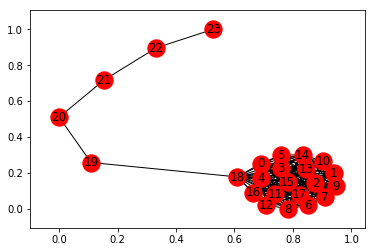

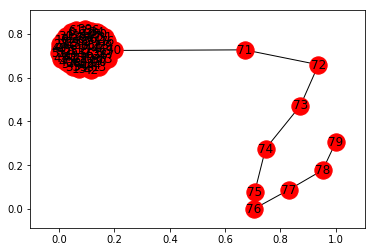

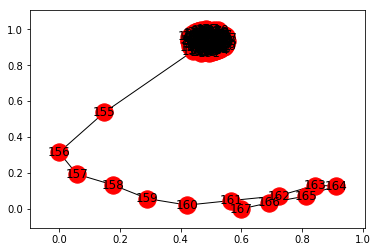

For (k=3418, n=59) the ratio of the diameter vs. avg. path length is 29.90280516762587


In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

for graph in [G3, G5, G7]:
    nx.draw_networkx(graph)
    plt.show()
    
print('For (k={}, n={}) the ratio of the diameter vs. avg. path length is {}'.format(*G30, fraction(*G30)))

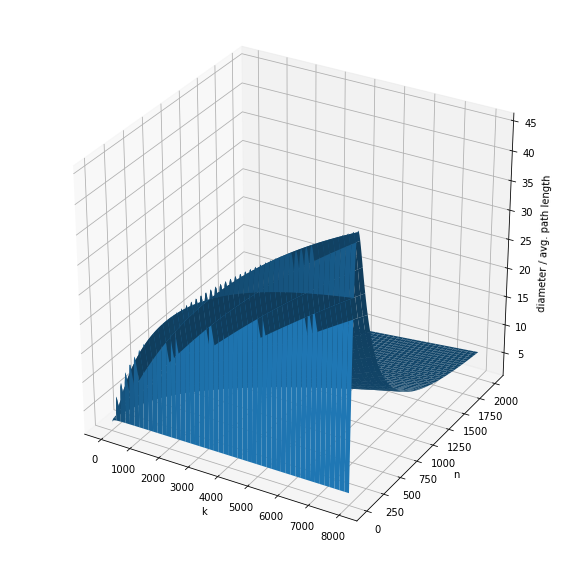

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('k')
ax.set_ylabel('n')
ax.set_zlabel('diameter / avg. path length')
ax.plot_surface(ks, ns, l)
plt.show()

Zoals vermeld hierboven zou een graaf van $k=71, n=9$ een ratio van ongeveer 5 moeten opleveren. Laten we dat nog eens controleren met NetworkX!

k: 71, n: 9


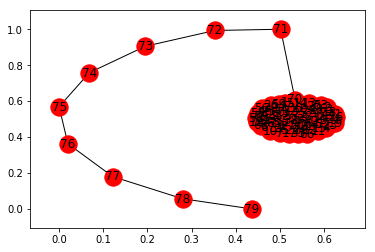

4.914463452566096 4.914463452566096


In [6]:
k, n = find_graph(5)
G5 = gen_graph(k, n)
print('k: {}, n: {}'.format(k, n))
nx.draw_networkx(G5)
plt.show()
print(nx.diameter(G5) / nx.average_shortest_path_length(G5), fraction(k, n))